In [ ]:
!pip install simplet5

: 

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

In [3]:
path = "/content/train.csv"
df = pd.read_csv(path)
df.head()

,Reviews,Sentiment
0,"When I first tuned in on this morning news, I ...",neg
1,"Mere thoughts of ""Going Overboard"" (aka ""Babes...",neg
2,Why does this movie fall WELL below standards?...,neg
3,Wow and I thought that any Steven Segal movie ...,neg
4,"The story is seen before, but that does'n matt...",neg


In [4]:
# simpleT5 expects dataframe to have 2 columns: "source_text" and "target_text"
df = df.rename(columns={"Sentiment":"target_text", "Reviews":"source_text"})
df = df[['source_text', 'target_text']]

# T5 model expects a task related prefix: since it is a sentiment task, we will add a prefix "review: "
df['source_text'] = "review: " + df['source_text']
df

,source_text,target_text
0,review: When I first tuned in on this morning ...,neg
1,"review: Mere thoughts of ""Going Overboard"" (ak...",neg
2,review: Why does this movie fall WELL below st...,neg
3,review: Wow and I thought that any Steven Sega...,neg
4,"review: The story is seen before, but that doe...",neg
...,...,...
24995,review: Everyone plays their part pretty well ...,pos
24996,review: It happened with Assault on Prescient ...,neg
24997,review: My God. This movie was awful. I can't ...,neg
24998,review: When I first popped in Happy Birthday ...,neg


In [7]:
df = df[:1200]
train_df, test_df = train_test_split(df, test_size=0.2)
train_df.shape, test_df.shape


((960, 2), (240, 2))

In [8]:
from simplet5 import SimpleT5

model = SimpleT5()
model.from_pretrained(model_type="t5", model_name="t5-base")
model.train(train_df=train_df,
            eval_df=test_df, 
            source_max_token_len=300, 
            target_max_token_len=50, 
            batch_size=6, max_epochs=2, use_gpu=False)

INFO:pytorch_lightning.utilities.seed:Global seed set to 42
INFO:pytorch_lightning.utilities.distributed:GPU available: False, used: False
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.distributed:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.614   Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.seed:Global seed set to 42


Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:688: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [ ]:
# let's load the trained model for inferencing:
model.load_model("t5","outputs/SimpleT5-epoch-2-train-loss-0.9478", use_gpu=True)

text_to_summarize="""summarize: Rahul Gandhi has replied to Goa CM Manohar Parrikar's letter, 
which accused the Congress President of using his "visit to an ailing man for political gains". 
"He's under immense pressure from the PM after our meeting and needs to demonstrate his loyalty by attacking me," 
Gandhi wrote in his letter. Parrikar had clarified he didn't discuss Rafale deal with Rahul.
"""
model.predict(text_to_summarize)

In [ ]:
!pip install ktrain
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 70.6 MB/s 
     |████████████████████████████████| 981 kB 47.3 MB/s 
     |████████████████████████████████| 263 kB 6.2 MB/s 
     |████████████████████████████████| 3.8 MB 29.2 MB/s 
     |████████████████████████████████| 1.3 MB 37.0 MB/s 
     |████████████████████████████████| 468 kB 49.3 MB/s 
     |████████████████████████████████| 182 kB 38.7 MB/s 
     |████████████████████████████████| 880 kB 43.4 MB/s 
     |████████████████████████████████| 7.6 MB 11.1 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.10-py3-none-any.whl size=25312982 sha256=bac5c6ae66d5465a3c7002877a61a515606d5b146f63340091afa72379f4af57
  Stored in directory: /root/.cache/pip/wheels/9c/1c/1b/6df2db85720b8f5c6ea5e3ae37313cfc656f248abf910b7cfd
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33516 sha256=47fb6a9d24e9b8fec8c0c05

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
## loading the train dataset
## change the path if necessary
train_data = pd.read_csv('/content/train.csv', dtype= str)[['Reviews','Sentiment']]
train_data = train_data.rename(columns={'reviews':'Reviews', 'rating':'Sentiment'})
train_data.head()

,Reviews,Sentiment
0,"When I first tuned in on this morning news, I ...",neg
1,"Mere thoughts of ""Going Overboard"" (aka ""Babes...",neg
2,Why does this movie fall WELL below standards?...,neg
3,Wow and I thought that any Steven Segal movie ...,neg
4,"The story is seen before, but that does'n matt...",neg


In [ ]:
## loading the test dataset
## change the path if necessary
test_data = pd.read_csv('/content/test.csv', dtype= str)[['Reviews','Sentiment']]
test_data = test_data.rename(columns={'reviews':'Reviews', 'rating':'Sentiment'})
test_data.head()

,Reviews,Sentiment
0,Who would have thought that a movie about a ma...,pos
1,After realizing what is going on around us ......,pos
2,I grew up watching the original Disney Cindere...,neg
3,David Mamet wrote the screenplay and made his ...,pos
4,"Admittedly, I didn't have high expectations of...",neg


In [ ]:
## dimension of the dataset

print("Size of train dataset: ",train_data.shape)
print("Size of test dataset: ",test_data.shape)


Size of train dataset:  (25000, 2)
Size of test dataset:  (25000, 2)


In [ ]:
train_data = train_data[0:1200]
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(train_data, test_size=0.2)

In [ ]:
## dimension of the dataset

print("Size of train dataset: ",train_data.shape)
print("Size of test dataset: ",test_data.shape)

Size of train dataset:  (960, 2)
Size of test dataset:  (240, 2)


In [ ]:
# text.texts_from_df return two tuples
# maxlen means it is considering that much words and rest are getting trucated
# preprocess_mode means tokenizing, embedding and transformation of text corpus(here it is considering BERT model)


(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=train_data,
                                                                   text_column = 'Reviews',
                                                                   label_columns = 'Sentiment',
                                                                   val_df = test_data,
                                                                   maxlen = 250,
                                                                   lang = 'en',
                                                                   preprocess_mode = 'bert') # or distilbert


['neg', 'pos']
     neg  pos
766  1.0  0.0
351  0.0  1.0
194  1.0  0.0
611  0.0  1.0
225  0.0  1.0
['neg', 'pos']
     neg  pos
348  0.0  1.0
408  1.0  0.0
180  0.0  1.0
55   1.0  0.0
957  1.0  0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
## size of data
print(X_train[0].shape, y_train.shape)
print(X_test[0].shape, y_test.shape)

(960, 250) (960, 2)
(240, 250) (240, 2)


In [ ]:
## define the bert model
model = text.text_classifier(name = 'bert', 
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 250
done.


In [ ]:
#here we have taken batch size as 6 as from the documentation it is recommend to use this with maxlen as 500
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                   val_data = (X_test, y_test),
                   batch_size = 6)

In [ ]:
#Essentially fit is a very basic training loop, whereas fit one cycle uses the one cycle policy callback

learner.fit_onecycle(lr = 2e-5, epochs = 2)
predictor = ktrain.get_predictor(learner.model, preproc)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/2
160/160 [==============================] - 3021s 19s/step - loss: 0.5425 - accuracy: 0.7000 - val_loss: 0.3376 - val_accuracy: 0.8667
Epoch 2/2
160/160 [==============================] - 2996s 19s/step - loss: 0.2324 - accuracy: 0.9156 - val_loss: 0.3294 - val_accuracy: 0.8625


In [ ]:
y_pred=predictor.predict(test_data['Reviews'].values)

8/8 [==============================] - 212s 26s/step


In [ ]:
y_true = test_data['Sentiment'].values

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: \n')
print(confusion_matrix(y_true, y_pred))

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: \n')
print(accuracy_score(y_true, y_pred))

# Recall
from sklearn.metrics import recall_score
print("Recall: \n")
print(recall_score(y_true, y_pred, average=None))

# Precision
from sklearn.metrics import precision_score
print('Precision: \n')
print(precision_score(y_true, y_pred, average=None))

# F1
#from sklearn.metrics import f1_score
#print('F1: \n')
#print(f1_score(y_test, y_pred, average=None))

## AUC-ROC Curve
y_pred_proba = predictor.predict(test_data['Reviews'].values, return_proba=True)
print(predictor.get_classes()) # probability of each class
print(y_pred_proba[:5,])

              precision    recall  f1-score   support

         neg       0.86      0.87      0.87       124
         pos       0.86      0.85      0.86       116

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240

Confusion Matrix: 

[[108  16]
 [ 17  99]]
Accuracy: 

0.8625
Recall: 

[0.87096774 0.85344828]
Precision: 

[0.864      0.86086957]
8/8 [==============================] - 207s 26s/step
['neg', 'pos']
[[0.21759301 0.782407  ]
 [0.95953417 0.04046574]
 [0.03675607 0.96324384]
 [0.9790783  0.02092163]
 [0.98053026 0.01946979]]


In [ ]:
print(y_true[1])

neg


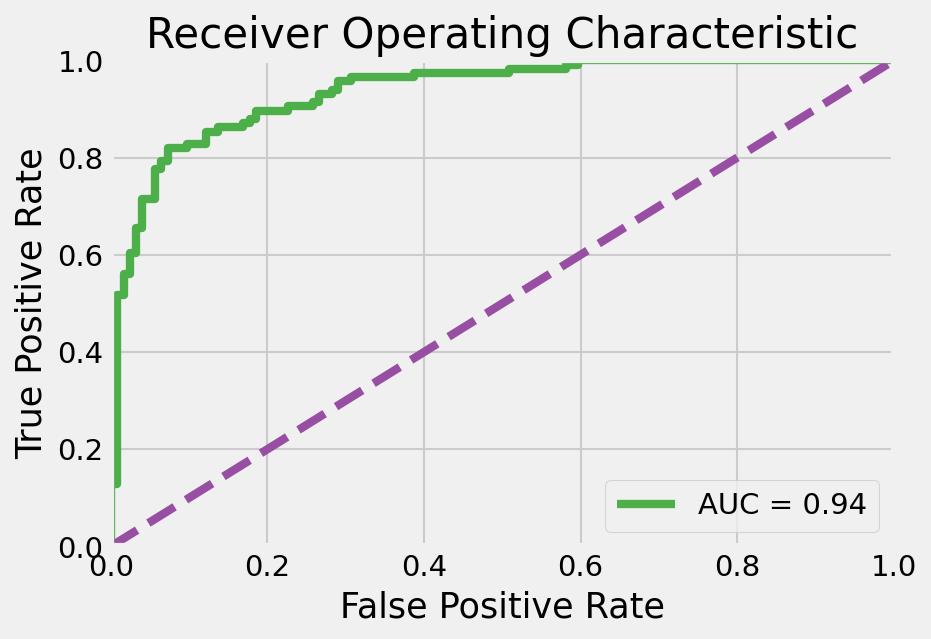

In [ ]:
y_true_binary = [1 if label=='pos' else 0 for label in y_true]
y_pred_proba_positive = y_pred_proba[:,1]
y_pred_proba_negative = y_pred_proba[:,0]
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score
# y_true = np.array([0, 0, 1, 1])
# y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true_binary, y_pred_proba_positive)


# import sklearn.metrics as metrics
# # calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1] # 
fpr, tpr, threshold = metrics.roc_curve(y_true_binary, y_pred_proba_positive)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
palette = plt.get_cmap('Set1')
print(palette)
plt.figure(dpi=150)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, color=palette(2))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color=palette(3))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()